In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv

In [3]:
# Load in csv
inflation_df= pd.read_csv('IMDB Movies-inflation-Mar22.csv')
inflation_df.head()
#inflation_df.columns

,imdb_title_id,original_title,year,date_published,genre 1,genre 2,genre 3,duration,country,language_1,...,desc35,avg_vote,votes,Budget - Inflation Adjusted,budget,USA Gross Income - Inflation Adjusted,usa_gross_income,WW Gross Income - Inflation Adjusted,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,2001.0,1/3/02,Comedy,Fantasy,Romance,118.0,USA,English,...,An English Duke from 1876 is inadvertedly,6.4,77852.0,"$70,146,403.16","$48,000,000.00","$68,863,102.48","$47,121,859.00","$111,092,974.77","$76,019,048.00",341.0
1,tt0118589,Glitter,2001.0,30/11/2001,Drama,Music,Romance,104.0,USA,English,...,A young singer dates a disc jockey,2.2,21298.0,"$32,150,434.78","$22,000,000.00","$6,246,547.43","$4,274,407.00","$7,703,925.18","$5,271,666.00",319.0
2,tt0120630,Chicken Run,2000.0,15/12/2000,Animation,Adventure,Comedy,84.0,"UK, USA, France",English,...,When a cockerel apparently flies,7.0,173987.0,"$67,633,536.59","$45,000,000.00","$160,568,875.40","$106,834,564.00","$337,919,038.00","$224,834,564.00",393.0
3,tt0120667,Fantastic Four,2005.0,16/09/2005,Action,Adventure,Fantasy,106.0,"USA, Germany",English,...,A group of astronauts gain superpowers,5.7,307944.0,"$132,519,713.26","$100,000,000.00","$205,002,801.64","$154,696,080.00","$442,000,863.36","$333,535,934.00",1029.0
4,tt0247196,Before Night Falls,2000.0,10/11/01,Biography,Drama,Romance,133.0,"USA, Mexico",English,...,"The life of Cuban poet and novelist,",7.2,23666.0,NaN,NaN,NaN,4242892,NaN,8601053,138.0


In [4]:
inflation_df.columns

Index(['imdb_title_id', 'original_title', 'year', 'date_published', 'genre 1',
       'genre 2', 'genre 3', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes',
       'Budget - Inflation Adjusted', ' budget ',
       ' USA Gross Income - Inflation Adjusted ', ' usa_gross_income ',
       ' WW Gross Income - Inflation Adjusted ', ' worlwide_gross_income ',
       'reviews_from_users'],
      dtype='object')

In [5]:
inflation_df[" USA Gross Income - Inflation Adjusted "] = inflation_df[" USA Gross Income - Inflation Adjusted "].replace('[\$,]', '', regex=True).astype(float)

In [6]:
actor_director_df = inflation_df[["actors_1", "director", "original_title", " USA Gross Income - Inflation Adjusted "]]
actor_director_df.head()

,actors_1,director,original_title,USA Gross Income - Inflation Adjusted
0,Meg Ryan,James Mangold,Kate & Leopold,6.886310e+07
1,Mariah Carey,Vondie Curtis-Hall,Glitter,6.246547e+06
2,Phil Daniels,"Peter Lord, Nick Park",Chicken Run,1.605689e+08
3,Ioan Gruffudd,Tim Story,Fantastic Four,2.050028e+08
4,Olatz L√≥pez Garmendia,Julian Schnabel,Before Night Falls,NaN


In [7]:
top_actors = actor_director_df.groupby(by="actors_1")
top_actors.head()
sorted_top_actors = top_actors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_actors.head()
#print (top_actors[" USA Gross Income - Inflation Adjusted "].dtype)

actors_1
Robert Downey Jr.    4.701903e+09
Johnny Depp          3.661996e+09
Will Smith           2.972164e+09
Adam Sandler         2.839811e+09
Tom Cruise           2.654136e+09
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

In [8]:
top_actors = actor_director_df.groupby(by="actors_1")
top_actors.head()
sorted_top_actors_mean = top_actors[" USA Gross Income - Inflation Adjusted "].mean().sort_values(ascending = False)
sorted_top_actors_mean.head()

actors_1
Mark Hamill        6.548212e+08
Albert Brooks      5.356871e+08
Noel Appleby       5.314711e+08
Ellen DeGeneres    5.243957e+08
Carrie Fisher      5.215585e+08
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

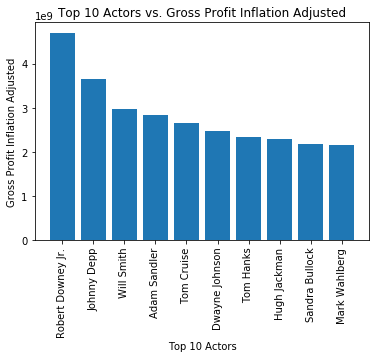

In [9]:
x_axis = sorted_top_actors.index[:10]
y_axis = sorted_top_actors.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Actors")
plt.ylabel("Gross Profit Inflation Adjusted")
plt.title("Top 10 Actors vs. Gross Profit Inflation Adjusted")
plt.show()

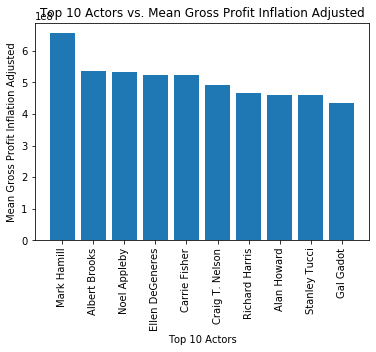

In [10]:
x_axis = sorted_top_actors_mean.index[:10]
y_axis = sorted_top_actors_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Actors")
plt.ylabel("Mean Gross Profit Inflation Adjusted")
plt.title("Top 10 Actors vs. Mean Gross Profit Inflation Adjusted")
plt.show()

In [34]:
top_directors = actor_director_df.groupby(by="director")
#top_directors.head()
sorted_top_directors = top_directors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_directors.head()
#print (top_actors[" USA Gross Income - Inflation Adjusted "].dtype)

director
Peter Jackson               2.735140e+09
J.J. Abrams                 2.427629e+09
Anthony Russo, Joe Russo    2.390225e+09
Christopher Nolan           2.379280e+09
Michael Bay                 2.339791e+09
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

In [12]:
top_directors = actor_director_df.groupby(by="director")
top_directors.head()
sorted_top_directors_mean = top_directors[" USA Gross Income - Inflation Adjusted "].mean().sort_values(ascending = False)
sorted_top_directors_mean.head()

director
James Cameron                    9.174536e+08
Andrew Adamson, Kelly Asbury     6.045220e+08
Andrew Stanton, Lee Unkrich      5.356871e+08
Andrew Stanton, Angus MacLane    5.243957e+08
Lee Unkrich                      4.925699e+08
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

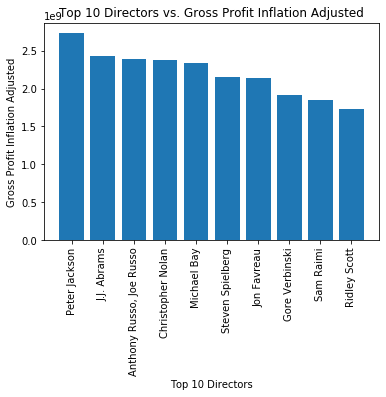

In [13]:
x_axis = sorted_top_directors.index[:10]
y_axis = sorted_top_directors.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Directors")
plt.ylabel("Gross Profit Inflation Adjusted")
plt.title("Top 10 Directors vs. Gross Profit Inflation Adjusted")
plt.show()

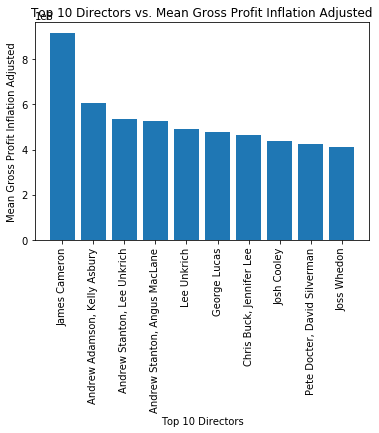

In [14]:
x_axis = sorted_top_directors_mean.index[:10]
y_axis = sorted_top_directors_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Directors")
plt.ylabel("Mean Gross Profit Inflation Adjusted")
plt.title("Top 10 Directors vs. Mean Gross Profit Inflation Adjusted")
plt.show()

In [15]:
top_movies = inflation_df.groupby(by="original_title")
top_movies.head()
sorted_top_movies = top_movies[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
sorted_top_movies.head()

original_title
Star Wars: Episode VII - The Force Awakens    1.022789e+09
Avatar                                        9.174536e+08
Avengers: Endgame                             8.689626e+08
Black Panther                                 7.219158e+08
Jurassic World                                7.122477e+08
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

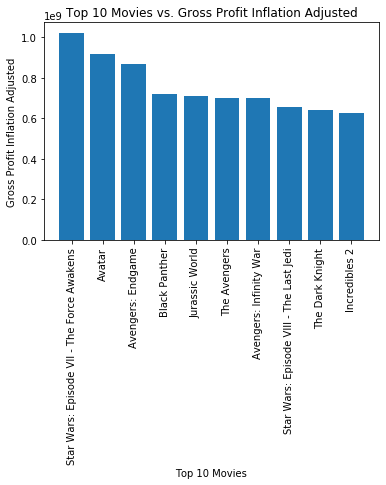

In [16]:
x_axis = sorted_top_movies.index[:10]
y_axis = sorted_top_movies.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Movies")
plt.ylabel("Gross Profit Inflation Adjusted")
plt.title("Top 10 Movies vs. Gross Profit Inflation Adjusted")
plt.show()

In [17]:
top_movies = inflation_df.groupby(by="original_title")
top_movies.head()
sorted_top_movies_mean = top_movies[" USA Gross Income - Inflation Adjusted "].mean().sort_values(ascending = False)
sorted_top_movies_mean.head()

original_title
Star Wars: Episode VII - The Force Awakens    1.022789e+09
Avatar                                        9.174536e+08
Avengers: Endgame                             8.689626e+08
Black Panther                                 7.219158e+08
Jurassic World                                7.122477e+08
Name:  USA Gross Income - Inflation Adjusted , dtype: float64

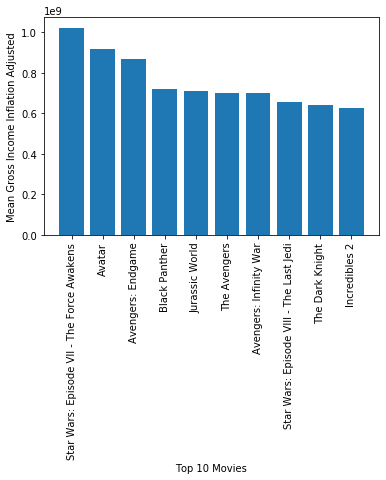

In [18]:
x_axis = sorted_top_movies_mean.index[:10]
y_axis = sorted_top_movies_mean.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Movies")
plt.ylabel("Mean Gross Income Inflation Adjusted")
plt.show()

In [19]:
# top_actors = actor_director_df.groupby(by="actors_1")
# top_actors.head()
# sorted_top_actors = top_actors[" USA Gross Income - Inflation Adjusted "].sum().sort_values(ascending = False)
# sorted_top_actors.tail(50)

In [20]:
# top_rated = inflation_df.groupby(by="original_title")
# top_rated.head()
# sorted_top_rated = top_rated["avg_vote"].mean().sort_values(ascending = False)
# sorted_top_rated.head(50)

In [21]:
actors_df = pd.DataFrame({
    "Top Actors": sorted_top_actors
})
actors_df

,Top Actors
actors_1,
Robert Downey Jr.,4.701903e+09
Johnny Depp,3.661996e+09
Will Smith,2.972164e+09
Adam Sandler,2.839811e+09
Tom Cruise,2.654136e+09
...,...
Ferdia Walsh-Peelo,0.000000e+00
Fatima El Bahraouy,0.000000e+00
Ok-bin Kim,0.000000e+00


In [22]:
actors_df.to_csv('actors.csv')

In [27]:
just_actors_df_2= pd.read_csv('actors.csv')
just_actors_df_2.head()

just_actors_df_2 = pd.read_excel('actors.xls').dropna()
just_actors_df_2.head()

,actors_1,gross_profit,gender
0,Robert Downey Jr.,4.701903e+09,M
1,Johnny Depp,3.661996e+09,M
2,Will Smith,2.972164e+09,M
3,Adam Sandler,2.839811e+09,M
4,Tom Cruise,2.654136e+09,M


In [29]:
actresses_df = just_actors_df_2.loc[just_actors_df_2["gender"] == "F"]
actresses_df

,actors_1,gross_profit,gender
8,Sandra Bullock,2.169103e+09,F
30,Jennifer Lawrence,1.427987e+09,F
38,Kristen Stewart,1.182177e+09,F
43,Kristen Bell,1.042916e+09,F
44,Reese Witherspoon,1.030070e+09,F
52,Angelina Jolie,9.184811e+08,F
59,Cameron Diaz,8.216388e+08,F
66,Anna Kendrick,7.499680e+08,F
68,Meryl Streep,7.432783e+08,F
69,Julia Roberts,7.307013e+08,F


In [35]:
top_actresses = actresses_df.groupby(by="actors_1")
sorted_top_actresses = top_actresses["gross_profit"].sum().sort_values(ascending = False)
sorted_top_actresses.head()

actors_1
Sandra Bullock       2.169103e+09
Jennifer Lawrence    1.427987e+09
Kristen Stewart      1.182177e+09
Kristen Bell         1.042916e+09
Reese Witherspoon    1.030070e+09
Name: gross_profit, dtype: float64

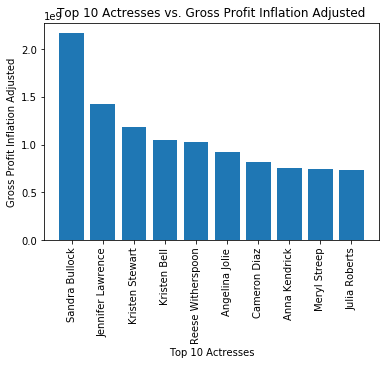

In [36]:
x_axis = sorted_top_actresses.index[:10]
y_axis = sorted_top_actresses.values[:10]
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Top 10 Actresses")
plt.ylabel("Gross Profit Inflation Adjusted")
plt.title("Top 10 Actresses vs. Gross Profit Inflation Adjusted")
plt.show()